In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# Load and process data

In [2]:
df = pd.read_csv("/Users/krystalgong/Downloads/PPD_data.csv").iloc[2:,:]
df = df[df['Status']=="IP Address"] # remove Survey Preview
df = df.replace({'Agree':'Somewhat agree','Disagree':'Somewhat disagree'})
df['Q39-3'] = df['Q39-1'].fillna(df['Q39-2'])
df['Q39-3'] = df['Q39-3'].replace({'1-2 years': '0-2 years'})
df['Q12-3'] = df['Q12-1'].fillna(df['Q12-2'])
df['Q36'] = df['Q36'].replace({'Non-binary':'Other'})
df['Q37'] = df['Q37'].replace({'Native American or Alaskan Native':'A race/ethnicity not listed here'})

df['Date'] = pd.to_datetime(df['RecordedDate']).dt.date
df = df[df['Date'] >= pd.to_datetime('2024-10-23').date()]

df['Progress'] = df['Progress'].astype(int)
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,QID1,QID79,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q6,Q7,QID43,Q8,Q9,Q10,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12-1,Q12-1_11_TEXT,Q12-2,Q12-2_11_TEXT,QID47,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q14,Q15,Q16,Q17_1,Q17_2,Q18,Q19,Q20,Q21,Q22,Q23_1,Q23_2,Q23_3,Q24,QID48,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,QID58,Q33,Q33_13_TEXT,Q34,Q35,Q36,Q36_3_TEXT,Q37,Q38,Q39,Q39-1,Q39-2,Q39-3,Q12-3,Date
23,2024-10-23 08:01:06,2024-10-23 08:09:32,IP Address,170.115.248.25,100,505,True,2024-10-23 08:09:32,R_1S6S2YOLmv7QIc9,NaN,NaN,NaN,NaN,40.0149,-75.1439,anonymous,EN,NaN,NaN,Somewhat disagree,Don't know/not sure,Somewhat agree,Somewhat disagree,Somewhat well,Somewhat well,Not too well,Somewhat well,Satisfied,Not sure,NaN,Somewhat agree,Somewhat agree,Somewhat agree,Neutral,Somewhat disagree,Neutral,Somewhat disagree,Somewhat agree,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral,Neutral,Somewhat disagree,Neutral,Neutral,NaN,Never,Strongly disagree,Somewhat agree,Somewhat agree,Not well at all,Not too well,Somewhat agree,Sometimes,NaN,Strongly disagree,Strongly disagree,Somewhat disagree,Somewhat agree,NaN,Somewhat agree,Strongly disagree,Strongly disagree,NaN,Strongly disagree,NaN,Strongly disagree,Sometimes,NaN,"Transfers,Training and Development,Promotions",NaN,NaN,50,Female,NaN,White or Caucasian,No,Sworn,More than 25 years,NaN,More than 25 years,NaN,2024-10-23
24,2024-10-23 08:01:22,2024-10-23 08:09:41,IP Address,170.115.248.25,100,499,True,2024-10-23 08:09:42,R_3nSYgHp2Rm797hf,NaN,NaN,NaN,NaN,40.0149,-75.1439,anonymous,EN,NaN,NaN,Strongly disagree,Strongly disagree,Somewhat disagree,Strongly disagree,Not well at all,Not well at all,Not well at all,Not well at all,Very dissatisfied,Too much,NaN,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Somewhat disagree,Strongly disagree,NaN,NaN,NaN,NaN,NaN,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Nothing they aren't cops and never will be the...,Hardly ever,Strongly disagree,Somewhat disagree,Somewhat disagree,Not well at all,Not well at all,Strongly agree,Hardly ever,you have to be in the in crowd its all in who ...,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,NaN,Strongly agree,Strongly disagree,Strongly disagree,its who you know doesn't matter about experience,Strongly disagree,same answer as the last three times you asked it,Strongly disagree,Hardly ever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-23
25,2024-10-23 08:01:11,2024-10-23 08:10:10,IP Address,104.28.76.117,100,538,True,2024-10-23 08:10:10,R_6N9Q7PpNf0cQm2o,NaN,NaN,NaN,NaN,39.9843,-75.2266,anonymous,EN,NaN,NaN,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat well,Somewhat well,Somewhat well,Somewhat well,Satisfied,Not sure,NaN,Somewhat agree,Don't know/Not sure,Somewhat disagree,Neutral,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,"Race,Age,Not sure",NaN,NaN,Somewhat agree,Somewhat agree,Somewhat agree,Neutral,Neutral,Neutral,NaN,Hardly ever,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat well,Not too well,Somewhat disagree,Sometimes,Not enough opportunities or denial of opportun...,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,NaN,Somewhat agree,Somewhat disagree,Strongly disagree,There is too much favoritism and bias in selec...,Strongly disagree,"Not enough communication, a lot of hidden tran...",Somewhat disagree,Sometimes,NaN,"Recruiting,Retention,Transfers",NaN,NaN,32,Male,NaN,Asian or Pacific Islander,Yes,Sworn,6-10 years,NaN,6-10 years,"Race,Age,Not sure",2024-10-23
26,2024-10-23 08:05:16,2024-10-23 08:11:25,IP Address,170.115.248.7,100,368,True,2024-10-23 08:11:25,R_6VyhD3VcG9CxJCE,NaN,NaN,N

## Survey distribution

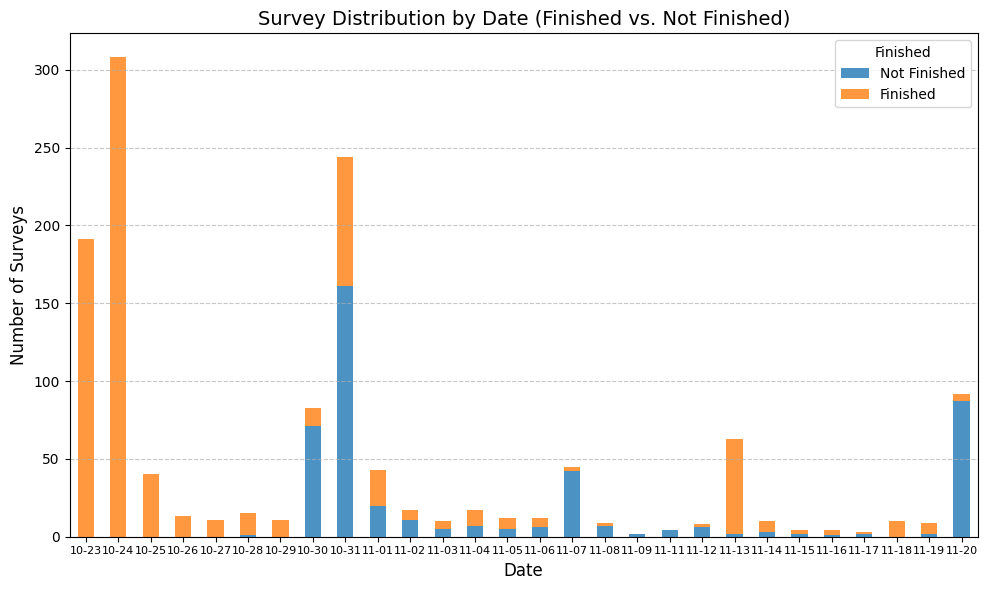

In [4]:
# Count the number of surveys by date and Finished status
date_finished_distribution = df.groupby(['Date', 'Finished']).size().unstack(fill_value=0)

# Plot the stacked bar chart
date_finished_distribution.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=['#1f77b4', '#ff7f0e'], 
    alpha=0.8
)
plt.title("Survey Distribution by Date (Finished vs. Not Finished)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Surveys", fontsize=12)

# Format x-ticks to show only month and day
plt.xticks(ticks=range(len(date_finished_distribution.index)), 
           labels=[date.strftime('%m-%d') for date in date_finished_distribution.index], 
           rotation=0, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title="Finished", labels=["Not Finished", "Finished"], fontsize=10)
plt.tight_layout()
# plt.show()

plt.savefig("plots/survey_distribution.png", dpi=300)
plt.show()

# markdown_content += f"![Survey Distribution by Data](/plots/survey_distribution.png)\n\n"


In [63]:
# # Bin the 'Progress' column
# bins = [0, 25, 50, 90, 95, 100]
# labels = ['0-25', '26-50', '51-90', '91-99', '100']
# df['Progress_Bin'] = pd.cut(df['Progress'], bins=bins, labels=labels, right=True)

# df[['Progress','Progress_Bin']]
# df['Progress_Bin'] = df['Progress_Bin'].astype(str)
# df['Progress_Bin'].value_counts()

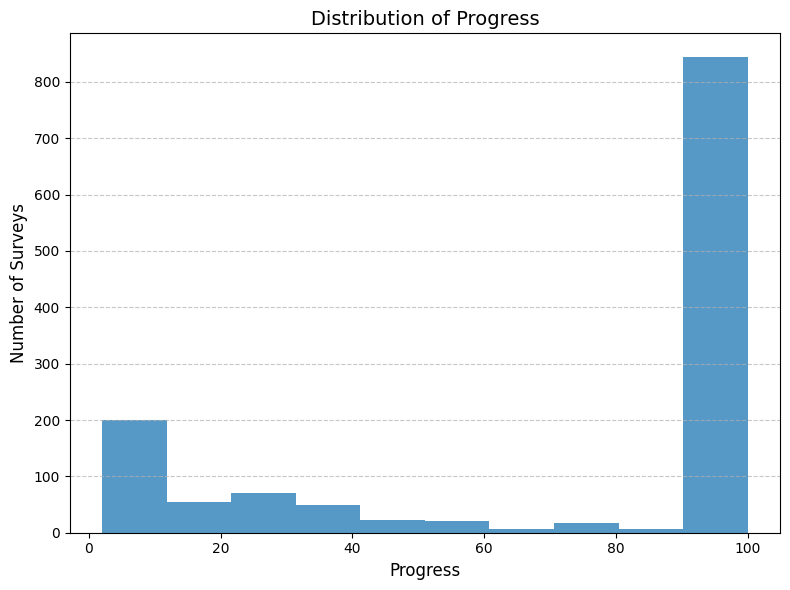

In [5]:
df['Progress'].plot(kind='hist', bins=10, figsize=(8, 6), alpha=0.75)

# Customize the plot
plt.title("Distribution of Progress", fontsize=14)
plt.xlabel("Progress", fontsize=12)
plt.ylabel("Number of Surveys", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("plots/progress_distribution.png", dpi=300)
plt.show()

## IP Address

In [6]:
import time
import requests

def get_location_from_ip(ip):
    time.sleep(5)
    params = ['query', 'status', 'country', 'countryCode', 'city', 'timezone', 'mobile']
    try:
        # Make the request to the API
        resp = requests.get(f'http://ip-api.com/json/{ip}', params={'fields': ','.join(params)})
        
        # Check if the response was successful
        if resp.status_code == 200:
            # Attempt to parse the response as JSON
            info = resp.json()
            
            # Check if the API status is 'success'
            if info.get('status') == 'success':
                return info.get('city', 'N/A'), info.get('country', 'N/A')
            else:
                print("API response status not successful:", info.get('status'))
                return None, None
        else:
            print(f"Request failed with status code {resp.status_code}")
            return None, None
    except requests.exceptions.RequestException as e:
        print("Request error:", e)
        return None, None
    except ValueError as e:
        print("JSON parsing error:", e)
        return None, None

# get_location_from_ip('170.115.248.25')

In [66]:
# ip_df = pd.DataFrame(df['IPAddress'].unique(), columns=['IPAddress'])
# ip_df[['City', 'Country']] = ip_df['IPAddress'].apply(lambda ip: pd.Series(get_location_from_ip(ip)))
# ip_df

In [7]:
ip_df = pd.read_csv('updated_ip.csv').iloc[:,1:]

new_ips = df[~df['IPAddress'].isin(ip_df['IPAddress'])]['IPAddress'].unique()
new_ip_df = pd.DataFrame(new_ips, columns=['IPAddress'])
new_ip_df[['City', 'Country']] = new_ip_df['IPAddress'].apply(lambda ip: pd.Series(get_location_from_ip(ip)))

updated_ip = pd.concat([ip_df, new_ip_df])

updated_ip.to_csv('updated_ip.csv')

In [8]:
updated_ip.to_csv('updated_ip.csv')

## Markdown section 1

In [9]:
updated_ip = pd.read_csv('updated_ip.csv')
df = df.merge(updated_ip, on='IPAddress', how='left')
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,QID1,QID79,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q6,Q7,QID43,Q8,Q9,Q10,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12-1,Q12-1_11_TEXT,Q12-2,Q12-2_11_TEXT,QID47,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q14,Q15,Q16,Q17_1,Q17_2,Q18,Q19,Q20,Q21,Q22,Q23_1,Q23_2,Q23_3,Q24,QID48,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,QID58,Q33,Q33_13_TEXT,Q34,Q35,Q36,Q36_3_TEXT,Q37,Q38,Q39,Q39-1,Q39-2,Q39-3,Q12-3,Date,Unnamed: 0,City,Country
0,2024-10-23 08:01:06,2024-10-23 08:09:32,IP Address,170.115.248.25,100,505,True,2024-10-23 08:09:32,R_1S6S2YOLmv7QIc9,NaN,NaN,NaN,NaN,40.0149,-75.1439,anonymous,EN,NaN,NaN,Somewhat disagree,Don't know/not sure,Somewhat agree,Somewhat disagree,Somewhat well,Somewhat well,Not too well,Somewhat well,Satisfied,Not sure,NaN,Somewhat agree,Somewhat agree,Somewhat agree,Neutral,Somewhat disagree,Neutral,Somewhat disagree,Somewhat agree,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral,Neutral,Somewhat disagree,Neutral,Neutral,NaN,Never,Strongly disagree,Somewhat agree,Somewhat agree,Not well at all,Not too well,Somewhat agree,Sometimes,NaN,Strongly disagree,Strongly disagree,Somewhat disagree,Somewhat agree,NaN,Somewhat agree,Strongly disagree,Strongly disagree,NaN,Strongly disagree,NaN,Strongly disagree,Sometimes,NaN,"Transfers,Training and Development,Promotions",NaN,NaN,50,Female,NaN,White or Caucasian,No,Sworn,More than 25 years,NaN,More than 25 years,NaN,2024-10-23,1,Philadelphia,United States
1,2024-10-23 08:01:22,2024-10-23 08:09:41,IP Address,170.115.248.25,100,499,True,2024-10-23 08:09:42,R_3nSYgHp2Rm797hf,NaN,NaN,NaN,NaN,40.0149,-75.1439,anonymous,EN,NaN,NaN,Strongly disagree,Strongly disagree,Somewhat disagree,Strongly disagree,Not well at all,Not well at all,Not well at all,Not well at all,Very dissatisfied,Too much,NaN,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Somewhat disagree,Strongly disagree,NaN,NaN,NaN,NaN,NaN,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Nothing they aren't cops and never will be the...,Hardly ever,Strongly disagree,Somewhat disagree,Somewhat disagree,Not well at all,Not well at all,Strongly agree,Hardly ever,you have to be in the in crowd its all in who ...,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,NaN,Strongly agree,Strongly disagree,Strongly disagree,its who you know doesn't matter about experience,Strongly disagree,same answer as the last three times you asked it,Strongly disagree,Hardly ever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-23,1,Philadelphia,United States
2,2024-10-23 08:01:11,2024-10-23 08:10:10,IP Address,104.28.76.117,100,538,True,2024-10-23 08:10:10,R_6N9Q7PpNf0cQm2o,NaN,NaN,NaN,NaN,39.9843,-75.2266,anonymous,EN,NaN,NaN,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat well,Somewhat well,Somewhat well,Somewhat well,Satisfied,Not sure,NaN,Somewhat agree,Don't know/Not sure,Somewhat disagree,Neutral,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,"Race,Age,Not sure",NaN,NaN,Somewhat agree,Somewhat agree,Somewhat agree,Neutral,Neutral,Neutral,NaN,Hardly ever,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat well,Not too well,Somewhat disagree,Sometimes,Not enough opportunities or denial of opportun...,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,NaN,Somewhat agree,Somewhat disagree,Strongly disagree,There is too much favoritism and bias in selec...,Strongly disagree,"Not enough communication, a lot of hidden tran...",Somewhat disagree,Sometimes,NaN,"Recruiting,Retention,Transfers",NaN,NaN,32,Male,NaN,Asian or Pacific Islander,Yes,Sworn,6-10 years,NaN,6-10 years,"Race,Age,Not sure",2024-10-23,2,Philadelphia,United States
3,2024-10-23 08:05:1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1290 entries, 0 to 1289
Data columns (total 90 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StartDate              1290 non-null   object 
 1   EndDate                1290 non-null   object 
 2   Status                 1290 non-null   object 
 3   IPAddress              1290 non-null   object 
 4   Progress               1290 non-null   int64  
 5   Duration (in seconds)  1290 non-null   object 
 6   Finished               1290 non-null   object 
 7   RecordedDate           1290 non-null   object 
 8   ResponseId             1290 non-null   object 
 9   RecipientLastName      0 non-null      float64
 10  RecipientFirstName     0 non-null      float64
 11  RecipientEmail         0 non-null      float64
 12  ExternalReference      0 non-null      float64
 13  LocationLatitude       843 non-null    object 
 14  LocationLongitude      843 non-null    object 
 15  Dist

In [11]:
df['Country'].value_counts()

United States    1290
Name: Country, dtype: int64

In [12]:
len(df['City'].unique())

110

In [13]:
df['City'].value_counts().head(20)

Philadelphia         1004
White Plains           42
New York               23
Reston                 16
Lansdale                8
Allentown               7
St Louis                7
Arlington               6
Dulles                  6
Bensalem                6
Anaheim                 6
Reading                 5
Ashburn                 5
Warrington              5
Southampton             4
Washington              4
Wilmington              4
Ballenger Creek         3
Huntingdon Valley       3
Warminster              3
Name: City, dtype: int64

In [14]:
df.shape[0]

1290

In [15]:
df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,QID1,QID79,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q6,Q7,QID43,Q8,Q9,Q10,Q11_1,Q11_2,Q11_3,Q12_1,Q12_2,Q12-1,Q12-1_11_TEXT,Q12-2,Q12-2_11_TEXT,QID47,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q14,Q15,Q16,Q17_1,Q17_2,Q18,Q19,Q20,Q21,Q22,Q23_1,Q23_2,Q23_3,Q24,QID48,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,QID58,Q33,Q33_13_TEXT,Q34,Q35,Q36,Q36_3_TEXT,Q37,Q38,Q39,Q39-1,Q39-2,Q39-3,Q12-3,Date,Unnamed: 0,City,Country
0,2024-10-23 08:01:06,2024-10-23 08:09:32,IP Address,170.115.248.25,100,505,True,2024-10-23 08:09:32,R_1S6S2YOLmv7QIc9,NaN,NaN,NaN,NaN,40.0149,-75.1439,anonymous,EN,NaN,NaN,Somewhat disagree,Don't know/not sure,Somewhat agree,Somewhat disagree,Somewhat well,Somewhat well,Not too well,Somewhat well,Satisfied,Not sure,NaN,Somewhat agree,Somewhat agree,Somewhat agree,Neutral,Somewhat disagree,Neutral,Somewhat disagree,Somewhat agree,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral,Neutral,Somewhat disagree,Neutral,Neutral,NaN,Never,Strongly disagree,Somewhat agree,Somewhat agree,Not well at all,Not too well,Somewhat agree,Sometimes,NaN,Strongly disagree,Strongly disagree,Somewhat disagree,Somewhat agree,NaN,Somewhat agree,Strongly disagree,Strongly disagree,NaN,Strongly disagree,NaN,Strongly disagree,Sometimes,NaN,"Transfers,Training and Development,Promotions",NaN,NaN,50,Female,NaN,White or Caucasian,No,Sworn,More than 25 years,NaN,More than 25 years,NaN,2024-10-23,1,Philadelphia,United States
1,2024-10-23 08:01:22,2024-10-23 08:09:41,IP Address,170.115.248.25,100,499,True,2024-10-23 08:09:42,R_3nSYgHp2Rm797hf,NaN,NaN,NaN,NaN,40.0149,-75.1439,anonymous,EN,NaN,NaN,Strongly disagree,Strongly disagree,Somewhat disagree,Strongly disagree,Not well at all,Not well at all,Not well at all,Not well at all,Very dissatisfied,Too much,NaN,Strongly agree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Somewhat disagree,Strongly disagree,NaN,NaN,NaN,NaN,NaN,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Nothing they aren't cops and never will be the...,Hardly ever,Strongly disagree,Somewhat disagree,Somewhat disagree,Not well at all,Not well at all,Strongly agree,Hardly ever,you have to be in the in crowd its all in who ...,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,NaN,Strongly agree,Strongly disagree,Strongly disagree,its who you know doesn't matter about experience,Strongly disagree,same answer as the last three times you asked it,Strongly disagree,Hardly ever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-23,1,Philadelphia,United States
2,2024-10-23 08:01:11,2024-10-23 08:10:10,IP Address,104.28.76.117,100,538,True,2024-10-23 08:10:10,R_6N9Q7PpNf0cQm2o,NaN,NaN,NaN,NaN,39.9843,-75.2266,anonymous,EN,NaN,NaN,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat disagree,Somewhat well,Somewhat well,Somewhat well,Somewhat well,Satisfied,Not sure,NaN,Somewhat agree,Don't know/Not sure,Somewhat disagree,Neutral,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,"Race,Age,Not sure",NaN,NaN,Somewhat agree,Somewhat agree,Somewhat agree,Neutral,Neutral,Neutral,NaN,Hardly ever,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat well,Not too well,Somewhat disagree,Sometimes,Not enough opportunities or denial of opportun...,Somewhat disagree,Somewhat disagree,Somewhat disagree,Somewhat agree,NaN,Somewhat agree,Somewhat disagree,Strongly disagree,There is too much favoritism and bias in selec...,Strongly disagree,"Not enough communication, a lot of hidden tran...",Somewhat disagree,Sometimes,NaN,"Recruiting,Retention,Transfers",NaN,NaN,32,Male,NaN,Asian or Pacific Islander,Yes,Sworn,6-10 years,NaN,6-10 years,"Race,Age,Not sure",2024-10-23,2,Philadelphia,United States
3,2024-10-23 08:05:1

In [16]:
city_counts = df['City'].value_counts()
major_cities = city_counts[city_counts > 5]

# Format the city count data into Markdown format
city_distribution_md = "\n".join([f"- {city}: {count} devices" for city, count in major_cities.items()])


markdown_content = f"""
Analysis on PPD surveys 11/21
===============================

The Philadelphia Police Department (PPD), in collaboration with researchers from the University of Pennsylvania, launched a Diversity, Equity, and Inclusion (DEI) survey to assess and advance its efforts toward creating a truly diverse, equitable, and inclusive workplace. This initiative is centered on fostering an environment that ensures fair treatment for all members, regardless of identity, and is a step toward aligning PPD’s practices with DEI goals. Working closely with the PPD's Interim Director of DEI, the survey was developed and launched on October 23, with a closing date set for November 20. Following the survey's release, PPD’s Director of Communications implemented a comprehensive outreach campaign to encourage maximum participation. Responses were collected both online and mail-in submissions, providing valuable insights into the department’s current climate and areas for improvement in DEI.

This report consists of three sections of analysis: **Basic Responses Distribution**, showing the distribution of respondent locations, dates, and progress; **Demographic Distribution**, covering the distributions of gender, race, sworn status, and years of service; and **Answer Distribution and Word Cloud**, displaying the response distributions and a word cloud for open-ended questions.

# Basic Responses Distribution

We convert IP address to actual cities and countries. All of the results are in United States and following is the distribution of majority cities with more than 5 devices from {df.shape[0]} survey responses including 4 mail-in responses:

{city_distribution_md}

We plot the survey received from each date and its completeness where orange is those fully completed surveys and blue are partially completed surveys:

![Survey Distribution by Date](/plots/survey_distribution.png)\n\n

We also plot the survey's progress distribution:

![Survey Progress Distribution](/plots/progress_distribution.png)\n\n
"""
print(markdown_content)


Analysis on PPD surveys 11/21

The Philadelphia Police Department (PPD), in collaboration with researchers from the University of Pennsylvania, launched a Diversity, Equity, and Inclusion (DEI) survey to assess and advance its efforts toward creating a truly diverse, equitable, and inclusive workplace. This initiative is centered on fostering an environment that ensures fair treatment for all members, regardless of identity, and is a step toward aligning PPD’s practices with DEI goals. Working closely with the PPD's Interim Director of DEI, the survey was developed and launched on October 23, with a closing date set for November 20. Following the survey's release, PPD’s Director of Communications implemented a comprehensive outreach campaign to encourage maximum participation. Responses were collected both online and mail-in submissions, providing valuable insights into the department’s current climate and areas for improvement in DEI.

This report consists of three sections of analys

# Answer Analysis

In [76]:
# questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5_1', 'Q5_2', 'Q5_3', 'Q5_4',
#        'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11_1', 'Q11_2', 'Q11_3',
#        'Q12_1', 'Q12_2', 
#        'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6',
#        'Q15', 'Q16', 'Q17_1', 'Q17_2', 'Q18', 'Q19', 'Q20', 'Q21',
#        'Q23_1', 'Q23_2', 'Q23_3', 'Q24', 'Q25', 'Q26', 'Q27',
#        'Q29', 'Q31', 'Q32', 'Q35',
#        'Q36', 'Q37', 'Q38', 'Q39', 'Q39-1', 'Q39-2']

# Other questions
# demographic: , 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q39-1', 'Q39-2'
# ['Q12-1', 'Q12-2', 'Q33'] # select from multiple answers
# ['Q12-1_11_TEXT', 'Q12-2_11_TEXT','Q14', 'Q22', 'Q28', 'Q30', 'Q33_13_TEXT', 'Q34', 'Q36_3_TEXT']
# ['QID43','QID47', 'QID48', 'QID58']
# ['Q35'] # numbers
# Note: 'Q12-1', 'Q12-2' different from 'Q12_1', 'Q12_2'


In [77]:
# def generate_markdown(df):
#     markdown_content = ""
#     for question in questions:
#         # Calculate percentage for each answer
#         value_counts = df[question].value_counts(normalize=True) * 100
#         markdown_content += f"## {question}\n\n"

#         # Add each answer and its percentage to the markdown content
#         for answer, percentage in value_counts.items():
#             markdown_content += f"- **{answer}**: {percentage:.2f}%\n"
        
#         markdown_content += "\n"  # Add spacing between questions

#     return markdown_content

# markdown_text = generate_markdown(df)

# # with open("survey_results.md", "w") as f:
# #     f.write(markdown_text)

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(df, question, filter=None, output_file="wordclouds/wordcloud.png"):
    # Filter the DataFrame based on the provided condition in `filter`
    if filter is not None:
        # Apply the filter condition and select the specified question column
        text = " ".join(df[filter][question].dropna().astype(str))
    else:
        # If no filter, just use the entire question column
        text = " ".join(df[question].dropna().astype(str))

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Save the word cloud as an image file
    wordcloud.to_file(output_file)


# Example usage with filter
# word_cloud(df, 'Q14')
# word_cloud(df, 'Q22', df['Q21'].isin(['Always']))


In [18]:
order1 = ["Strongly agree", "Somewhat agree", "Somewhat disagree", "Strongly disagree", "Don't know/not sure"]
order2 = ["Very well", "Somewhat well", "Not too well", "Not well at all"]
order3 = ["Very satisfied", "Satisfied", "Dissatisfied", "Very dissatisfied"]
order4 = ["Too much", "About right", "Too little", "Not sure"]
order5 = ["Strongly agree", "Somewhat agree", "Somewhat disagree", "Strongly disagree", "Don't know/Not sure"] # Not sure
order6 = ["Strongly agree", "Somewhat agree", "Somewhat disagree", "Strongly disagree"]
order7 = ["Strongly agree", "Somewhat agree", "Neutral", "Somewhat disagree", "Strongly disagree"]
order8 = ["Always", "Usually", "Sometimes", "Hardly ever", "Never"]
order9 = ["Strongly agree", "Somewhat agree", "Somewhat disagree", "Strongly disagree", "Don't know"]
order_12 = [
    "Race", "Sex", "Gender", "Age", "Disability", "Religion", "Nationality", 
    "Sexual orientation", "Family care status/your responsibilities to your family", 
    "Military status", "Other [Please write in]"
]

order_33 = [
    "Recruiting",
    "Hiring",
    "Retention",
    "Transfers",
    "Training and Development",
    "Community engagement and relations",
    "Leadership development",
    "Promotions",
    "Written policies",
    "Workplace culture",
    "Employee support and wellbeing programs",
    "Reporting and addressing discrimination or bias",
    "Other"
]

order_39 = ['0-2 years', '3-5 years', '6-10 years', '11-15 years', '16-25 years', 'More than 25 years']

category_order = {'Q1':order1, 'Q2':order1, 'Q3':order5, 'Q4':order5, 'Q5_1':order2, 'Q5_2':order2, 'Q5_3':order2, 'Q5_4':order2,
       'Q6':order3, 'Q7':order4, 'Q8':order5, 'Q9':order5, 'Q10':order6, 'Q11_1':order7, 'Q11_2':order7, 'Q11_3':order7,
       'Q12_1':order6, 'Q12_2':order6, 'Q12-3':order_12,
       'Q13_1':order7, 'Q13_2':order7, 'Q13_3':order7, 'Q13_4':order7, 'Q13_5':order7, 'Q13_6':order7, 'Q14': 'text',
       'Q15':order8, 'Q16':order6, 'Q17_1':order6, 'Q17_2':order6, 'Q18':order2, 'Q19':order2, 'Q20':order6, 'Q21':order8, 'Q22':'text',
       'Q23_1':order9, 'Q23_2':order9, 'Q23_3':order9, 'Q24':order9, 'Q25':order6, 'Q26':order9, 'Q27':order9, 'Q28':'text',
       'Q29':order9, 'Q30':'text', 'Q31':order9, 'Q32':order8, 'Q33':order_33, 'Q34':'text'}

In [19]:
question_text = {
    'Q1':"Do you agree or disagree with the following statements? I am valued within the Philadelphia Police Department.", 
    'Q2':"The Philadelphia Police Department considers diverse perspectives when making decisions.", 
    'Q3':"Do you agree or disagree with the following statements? The Philadelphia Police Department communicates important information regarding departmental changes to its personnel.", 
    'Q4':"The Philadelphia Police Department communicates updates on the strategic direction of the department to its personnel.", 
    'Q5_1':"In general, how well does the Philadelphia Police Department do each of the following? \n Communicates your job responsibilities to you clearly", 
    'Q5_2':"In general, how well does the Philadelphia Police Department do each of the following? \n Trains you adequately for your job", 
    'Q5_3':"In general, how well does the Philadelphia Police Department do each of the following? \n Equips you adequately to perform your job", 
    'Q5_4':"Makes sure you are safe while doing your job",
    'Q6':"Please rate your overall satisfaction with the Philadelphia Police Department as a place to work.", 
    'Q7':"Do you feel that the Philadelphia Police Department prioritizes Diversity, Equity, and Inclusion…", 
    'Q8':"Do you agree or disagree with the following statement? I understand what Diversity, Equity, and Inclusion (DEI) is.", 
    'Q9':"Do you agree or disagree with the following statement? I feel comfortable defining DEI.", 
    'Q10':"To what extent do you agree with the following statement: “I am comfortable talking about issues related to diversity, equity, and inclusion.”", 
    'Q11_1':"To what extent do you agree or disagree with the following statements? \n The Philadelphia Police Department is dedicated to building a diverse workplace.", 
    'Q11_2':"To what extent do you agree or disagree with the following statements? \n The Philadelphia Police Department is dedicated to building an equitable workplace.", 
    'Q11_3':"To what extent do you agree or disagree with the following statements? \n The Philadelphia Police Department is dedicated to building an inclusive workplace.",
    'Q12_1':"Do you agree or disagree with the following statements: \n I have personally experienced discrimination in the Philadelphia Police Department.", 
    'Q12_2':"Do you agree or disagree with the following statements: \n I have witnessed discrimination against other people in the Philadelphia Police Department.",
    'Q13_1':"To what extent do you agree or disagree with the following statement? \n The Philadelphia Police Department values non-sworn professional staff.", 
    'Q13_2':"To what extent do you agree or disagree with the following statement? \n The Philadelphia Police Department is dedicated to the inclusiveness of non-sworn professional staff.", 
    'Q13_3':"To what extent do you agree or disagree with the following statement? \n Sworn personnel respect the work of non-sworn professional staff.", 
    'Q13_4':"To what extent do you agree or disagree with the following statement? \n Sworn personnel helps non-sworn professional staff adapt to police culture.", 
    'Q13_5':"To what extent do you agree or disagree with the following statement? \n There is a “sworn” vs. “non-sworn” culture within the Philadelphia Police Department.", 
    'Q13_6':"To what extent do you agree or disagree with the following statement? \n The relationship between non-sworn professional staff and sworn personnel at the Philadelphia Police Department needs improvement.",
    'Q15':"How often are employees in your department asked for their input on decisions that will affect them?", 
    'Q16':"When decisions are made within the Philadelphia Police Department, they are effectively communicated to Department personnel.", 
    'Q17_1':"Do you agree or disagree with the following statements: \n I am treated with respect, regardless of my identity (race, gender, age, sexual orientation, etc.).", 
    'Q17_2':"Do you agree or disagree with the following statements: \n Others are treated with respect, regardless of their identity.", 
    'Q18':"How well does the Philadelphia Police Department manage internal conflicts and disagreements among its personnel?", 
    'Q19':"How well does the Philadelphia Police Department addresses concerns and complaints raised by its personnel?", 
    'Q20':"I have access to tools to support my mental health.", 
    'Q21':"How often does the Philadelphia Police Department provide opportunities for professional development and training for its personnel?",
    'Q23_1':"Please tell us if you agree or disagree with the following statements. \n In the Philadelphia Police Department, the disciplinary process is fair.", 
    'Q23_2':"Please tell us if you agree or disagree with the following statements. \n Personnel who consistently do a poor job are held accountable.", 
    'Q23_3':"Please tell us if you agree or disagree with the following statements. \n When I do well, I am rewarded within the PPD.", 
    'Q24':"To what extent do you agree with the following statement: I feel safe reporting misconduct or unsafe conditions within the Philadelphia Police Department?", 
    'Q25':"I sometimes get conflicting instructions from my supervisors.", 
    'Q26':"Do you agree or disagree with the following statements? \n The process for assignments and promotions within the Philadelphia Police Department is effective at ensuring that people are well qualified for their positions.", 
    'Q27':"The process for transfers and assignments within the Philadelphia Police Department is fair.",
    'Q29':"The process for transfers and assignments within the Philadelphia Police Department is transparent.", 
    'Q31':"The process for promotions within the Philadelphia Police Department is fair.", 
    'Q32':"How often do you feel the Philadelphia Police Department recognizes and rewards personnel for their efforts and accomplishments on the job with new professional opportunities?",

    'Q14':"What would help improve the relationship between non-sworn and sworn personnel at the Philadelphia Police Department?",
    'Q22':"You just told us that the Philadelphia Police Department (always/usually/sometimes/hardly ever/never) provides opportunities for professional development and training for its personnel. In one sentence, can you explain why you think so?",
    'Q28':"You just told us that you (agree or disagree) that the process for transfers and assignments is fair. In one sentence, can you explain why you think so?",
    'Q30':"You just told us that you (agree or disagree) that the process for transfers and assignments is transparent. In one sentence, can you explain why you think so?",
    'Q34':"Are there any other comments or suggestions you would like to share that was not asked in this survey?",
    'Q12-3':"You said that you (strongly) agree with the statement “I have personally experienced discrimination in the Philadelphia Police Department.” Would you say that the discrimination you experienced was due to",
    'Q33':'Please select up to three areas that you believe should be prioritized by the DEI Office.\nIf you choose "Other", kindly specify any additional areas you think should be considered.\nYour insights will contribute significantly to shaping the focus and priorities of our DEI initiatives. Thank you for your valuable input.',
    'Q36':"What is your gender?",
    'Q37':"Which of the following best describes you?",
    'Q39':"Are you a sworn or non-sworn professional employee of the Philadelphia Police Department?",
    'Q39-3':"How many years have you been on the force? OR How many years have you worked for the Philadelphia Police Department?",
    }

In [20]:
markdown_content += "# Demographic distribution \n\n \
**Note**: Due to the small number of responses in certain categories, **Non-binary** has been combined with **Other** under gender, and **Native American or Alaskan Native** has been combined with **A race/ethnicity not listed here** in race. \n\n"

for question in ['Q36', 'Q37', 'Q39', 'Q39-3']:
    value_counts = df[question].value_counts(normalize=True) * 100
    markdown_content += f"## {question}\n **{question_text[question]}** \n\n"
    order_39 = ['0-2 years', '3-5 years', '6-10 years', '11-15 years', '16-25 years', 'More than 25 years']
    
    if question != 'Q39-3':
        for answer, percentage in value_counts.items():
            markdown_content += f"- {answer}: {percentage:.2f}%\n"
    else:
        for answer in order_39:
            if answer in value_counts:
                markdown_content += f"- {answer}: {value_counts[answer]:.2f}%\n"
    markdown_content += "\n"

In [82]:
# df[['Q36', 'Q37', 'Q39', 'Q39-3', 'Q21', 'Q22', 'Q27', 'Q28', 'Q29', 'Q30']].dropna(how='all').to_csv('open_ended_questions.csv')

In [21]:
markdown_content += "# Answer Distribution and Word Cloud\n\n\
**Note**: Questions Q14, Q22, Q28, Q30, and Q34 are open-ended and include word clouds. Questions Q12-3 and Q33 are multiple-choice. \n\n"

for question, order in category_order.items():

    markdown_content += f"## {question}\n **{question_text[question]}** \n\n"

    if question in ['Q14', 'Q34']:
        # markdown_content += "WordCloud: \n\n"
        word_cloud(df, question, output_file=f"wordclouds/{question}.png")
        markdown_content += f"![Word Cloud for {question}](/wordclouds/{question}.png)\n\n"

    elif question == 'Q22':
        markdown_content += "### WordCloud for **Always**, **Usually**, **Sometimes** \n\n"
        word_cloud(df, 'Q22', df['Q21'].isin(['Always', 'Usually', 'Sometimes']), output_file=f"wordclouds/{question}_1.png")
        markdown_content += f"![Word Cloud for {question}](/wordclouds/{question}_1.png)\n\n"

        markdown_content += "### WordCloud for **Hardly ever**, **Never** \n\n"
        word_cloud(df, 'Q22', df['Q21'].isin(['Hardly ever', 'Never']), output_file=f"wordclouds/{question}_2.png")
        markdown_content += f"![Word Cloud for {question}](/wordclouds/{question}_2.png)\n\n"

    elif question in ['Q28', 'Q30']:
        if question == 'Q28':
            prev = 'Q27'
        elif question == 'Q30':
            prev = 'Q29'

        markdown_content += "### WordCloud for **Strongly agree**, **Somewhat agree** \n"
        word_cloud(df, question, df[prev].isin(['Strongly agree', 'Somewhat agree']), output_file=f"wordclouds/{question}_1.png")
        markdown_content += f"![Word Cloud for {question}](/wordclouds/{question}_1.png)\n\n"

        markdown_content += "### WordCloud for **Somewhat disagree**, **Strongly disagree** \n"
        word_cloud(df, question, df[prev].isin(['Somewhat disagree', 'Strongly disagree']), output_file=f"wordclouds/{question}_2.png")
        markdown_content += f"![Word Cloud for {question}](/wordclouds/{question}_2.png)\n\n"
    
    elif question in ['Q12-3', 'Q33']:
        # Step 1: Expand each respondent's answer into separate rows
        df_expanded = df.assign(Choice=df[question].str.split(',')).explode('Choice')
        df_expanded['Choice'] = df_expanded['Choice'].str.strip()  # Remove any extra whitespace

        # Step 2: Calculate the percentage of respondents selecting each option
        total_responses = df[question].nunique()  # Total unique respondents
        value_counts = df_expanded['Choice'].value_counts(normalize=True) * 100
        for option in order:
            if option in value_counts:
                markdown_content += f"- {option}: {value_counts[option]:.2f}%\n"
            else:
                markdown_content += f"- {option}: 0.00%\n"
        markdown_content += "\n"

        # Step 3: Define the function to create ordered cross-tabulation tables in Markdown format
        def create_ordered_table_markdown(df_expanded, order, demographic_column):
            # Generate a cross-tabulation table
            cross_tab = pd.crosstab(df_expanded['Choice'], df_expanded[demographic_column], normalize='columns') * 100
            cross_tab = cross_tab.reindex(order)  # Ensure the rows are in the specified order
            if other_question == 'Q39-3':
                cross_tab = cross_tab[order_39]
            
            # Add Sample Size row for each demographic group
            sample_sizes = df[demographic_column].value_counts()
            cross_tab.loc['Sample Size (n)'] = sample_sizes
            
            # Convert to Markdown format
            return cross_tab.to_markdown() + "\n\n"

        for other_question in ['Q36', 'Q37', 'Q39', 'Q39-3']:
            markdown_content += create_ordered_table_markdown(df_expanded, order, other_question)

    else:
        df[question] = pd.Categorical(df[question], categories=order, ordered=True)

        value_counts = df[question].value_counts(normalize=True) * 100
        for answer in order:
            if answer in value_counts:
                markdown_content += f"- {answer}: {value_counts[answer]:.2f}%\n"
        markdown_content += "\n"  # Add spacing between questions

        def create_ordered_table_markdown(df, question, other_question):
            cross_tab_from_df = pd.crosstab(df[question], df[other_question])
            table = cross_tab_from_df.apply(lambda x: round(x / x.sum() * 100, 2), axis=0)
            table = table.reindex(order)  # Ensure the rows are in the desired order
            if other_question == 'Q39-3':
                table = table[order_39]
            table.loc['Sample Size (n)'] = cross_tab_from_df.sum().astype(int)
            
            # Convert the table to markdown format
            markdown_table = table.to_markdown() + "\n\n"  # Convert table to markdown format
            return markdown_table

        for other_question in ['Q36', 'Q37', 'Q39', 'Q39-3']:
            markdown_content += create_ordered_table_markdown(df, question, other_question)

output_path = f"PPD_analysis_112124-kg.md"
with open(output_path, 'w') as file:
    file.write(markdown_content)

In [85]:
output_path = f"PPD_analysis.md"
with open(output_path, 'w') as file:
    file.write(markdown_content)